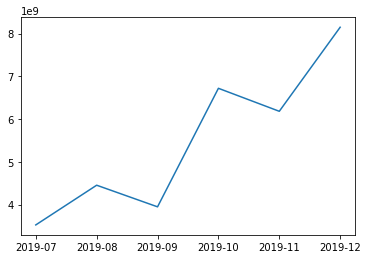

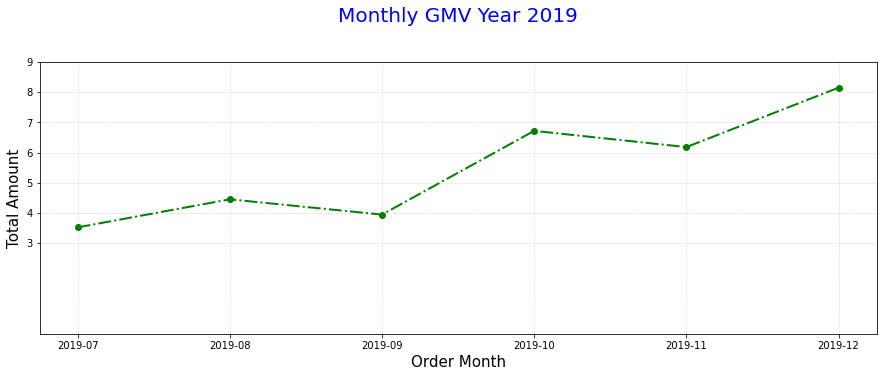

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

dataset['order_month'] = dataset ['order_date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

dataset['gmv'] = dataset['item_price']*dataset['quantity']

monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()

# Line Chart
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])

# Mengubah Figsize dan kustomisasi line point
plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)

# Menambah Label dan kustomissasi
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)

# Kustom Grid
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

#  Kustom Axis Tick
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

# menentukan batas min dan batas max
plt.ylim(ymin=0)

plt.show()
